In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
def bar_plot(feature):
  survived=train[train['Survived']==1][feature].value_counts()
  dead=train[train['Survived']==0][feature].value_counts()
  dataset=pd.DataFrame([survived,dead])
  dataset.index=['Survived','Dead']
  return dataset.plot.bar(figsize=(10,5))


<AxesSubplot:>

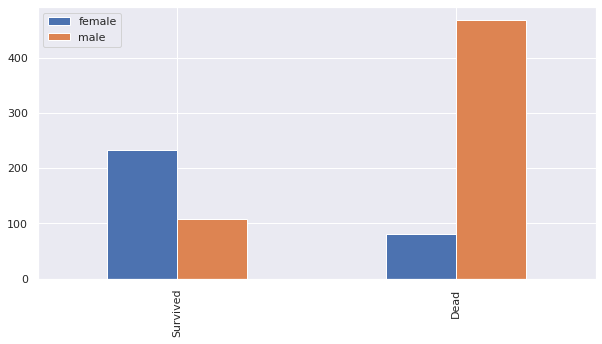

In [11]:
bar_plot('Sex')

<AxesSubplot:>

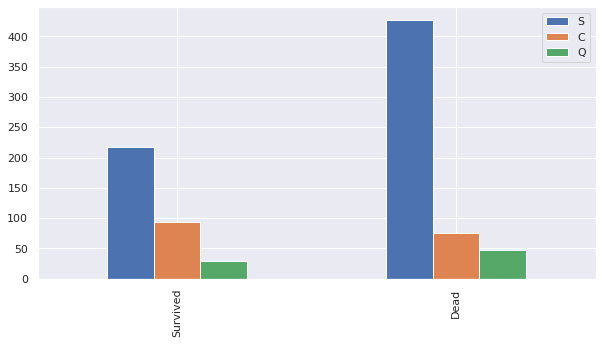

In [12]:
bar_plot('Embarked')

<AxesSubplot:>

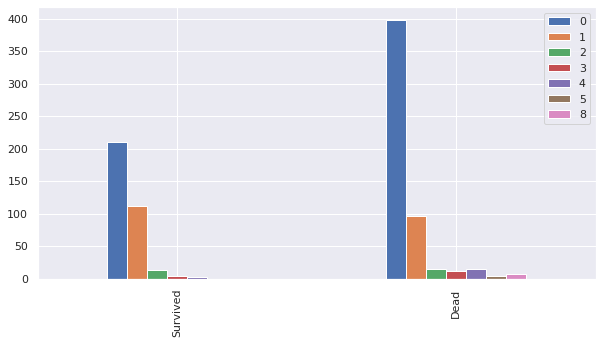

In [13]:
bar_plot('SibSp')

<AxesSubplot:>

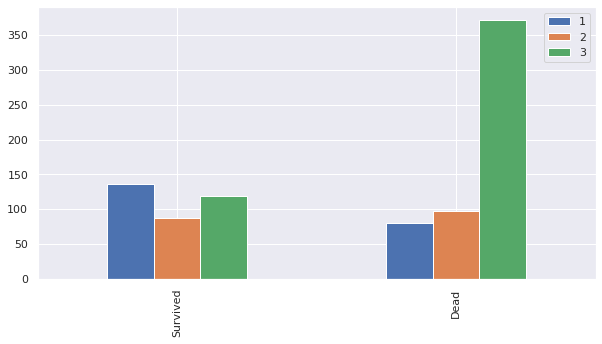

In [14]:
bar_plot('Pclass')

In [15]:
train_test_data=[train,test]
train_test_data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [16]:
for dataset in train_test_data:
  dataset['Title']=dataset['Name'].str.extract(pat=' ([A-Za-z]+)\.',expand=False)

In [17]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Sir           1
Lady          1
Jonkheer      1
Countess      1
Ms            1
Capt          1
Mme           1
Don           1
Name: Title, dtype: int64

In [18]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [19]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

<AxesSubplot:>

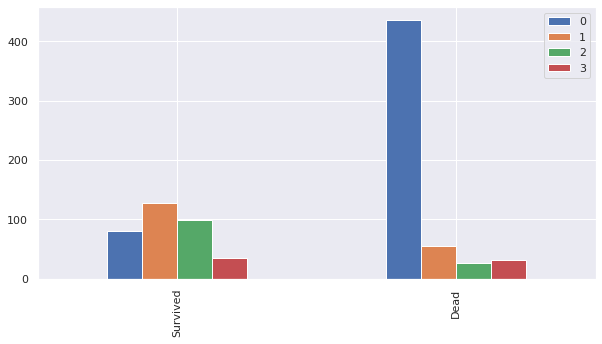

In [20]:
bar_plot('Title')

In [21]:
train.drop(['Name'],axis=1,inplace=True)
test.drop(['Name'],axis=1,inplace=True)

In [22]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [23]:
sex_mapping={"male":0,"female":1}
for dataset in train_test_data:
  dataset['Sex']=dataset['Sex'].map(sex_mapping)


In [24]:
train['Age'].fillna(train.groupby(['Title'])['Age'].transform("median"),inplace=True)
test['Age'].fillna(test.groupby(['Title'])['Age'].transform("median"),inplace=True)

(0.0, 20.0)

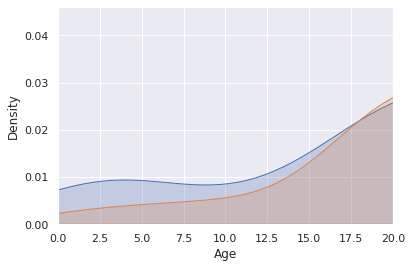

In [25]:
sns.kdeplot(x=train[train['Survived']==1]['Age'],shade='true')
sns.kdeplot(x=train[train['Survived']==0]['Age'],shade='true')
plt.xlim(0,20)

(20.0, 40.0)

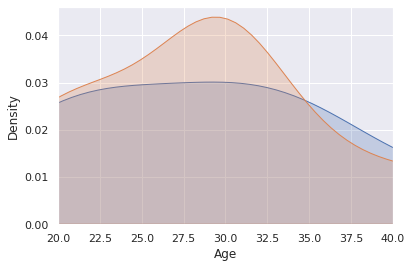

In [26]:
sns.kdeplot(x=train[train['Survived']==1]['Age'],shade='true')
sns.kdeplot(x=train[train['Survived']==0]['Age'],shade='true')
plt.xlim(20,40)


(40.0, 60.0)

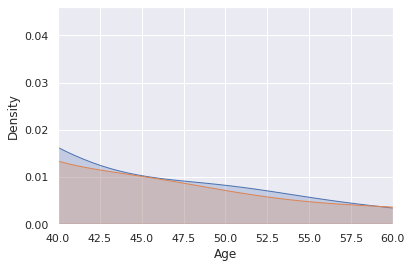

In [27]:
sns.kdeplot(x=train[train['Survived']==1]['Age'],shade='true')
sns.kdeplot(x=train[train['Survived']==0]['Age'],shade='true')
plt.xlim(40,60)


(60.0, 80.0)

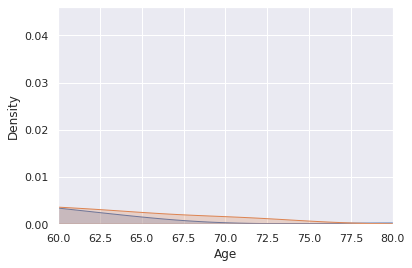

In [28]:
sns.kdeplot(x=train[train['Survived']==1]['Age'],shade='true')
sns.kdeplot(x=train[train['Survived']==0]['Age'],shade='true')
plt.xlim(60,80)


In [29]:
for dataset in train_test_data:
  dataset.loc[dataset['Age']<=13,'Age']=1;
  dataset.loc[(dataset['Age']>13) & (dataset['Age']<=18),'Age']=2;
  dataset.loc[(dataset['Age']>18) & (dataset['Age']<=30),'Age']=3;
  dataset.loc[(dataset['Age']>30) & (dataset['Age']<=50),'Age']=4;
  dataset.loc[(dataset['Age']>50) & (dataset['Age']<=80),'Age']=5;

<AxesSubplot:>

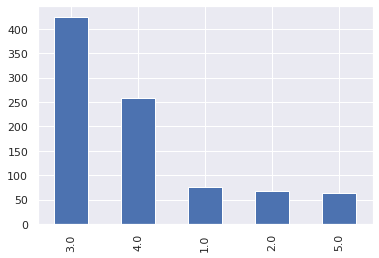

In [30]:
train['Age'].value_counts().plot.bar()

<AxesSubplot:>

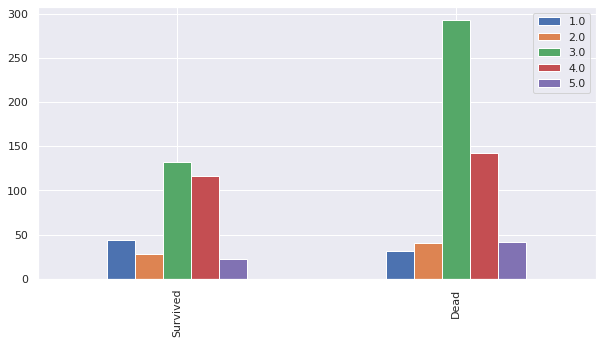

In [31]:
bar_plot('Age')

<AxesSubplot:>

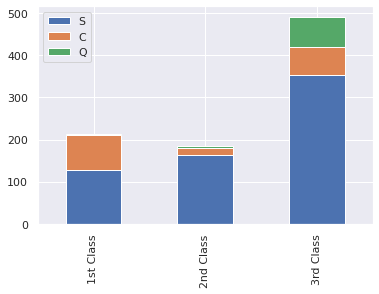

In [32]:
P1=train[train['Pclass']==1]['Embarked'].value_counts()
P2=train[train['Pclass']==2]['Embarked'].value_counts()
P3=train[train['Pclass']==3]['Embarked'].value_counts()
df=pd.DataFrame([P1,P2,P3])
df.index=['1st Class','2nd Class','3rd Class']
df.plot.bar(stacked=True)

In [33]:
train['Embarked'].fillna('S',inplace=True)

In [34]:
for dataset in train_test_data:
  dataset.loc[dataset['Embarked']=='S','Embarked']=1;
  dataset.loc[dataset['Embarked']=='C','Embarked']=2;
  dataset.loc[dataset['Embarked']=='Q','Embarked']=3;
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,3.0,1,0,A/5 21171,7.2500,NaN,1,0
1,2,1,1,1,4.0,1,0,PC 17599,71.2833,C85,2,2
2,3,1,3,1,3.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1
3,4,1,1,1,4.0,1,0,113803,53.1000,C123,1,2
4,5,0,3,0,4.0,0,0,373450,8.0500,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,3.0,0,0,211536,13.0000,NaN,1,3
887,888,1,1,1,3.0,0,0,112053,30.0000,B42,1,1
888,889,0,3,1,3.0,1,2,W./C. 6607,23.4500,NaN,1,1
889,890,1,1,0,3.0,0,0,111369,30.0000,C148,2,0


In [35]:
train['Fare'].fillna(train.groupby(['Pclass'])['Fare'].transform("mean"),inplace=True)
test['Fare'].fillna(test.groupby(['Pclass'])['Fare'].transform("mean"),inplace=True)

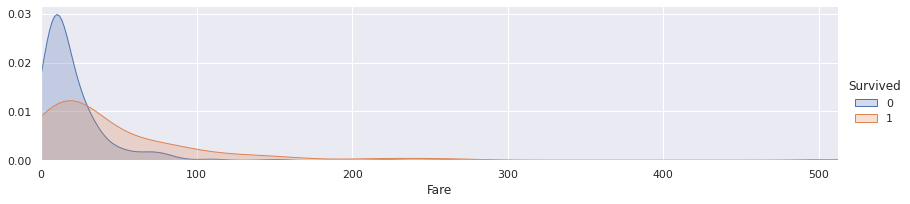

In [36]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

(0.0, 20.0)

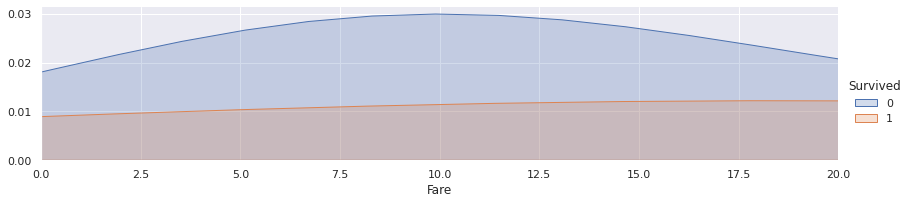

In [37]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.xlim(0,20)

(20.0, 40.0)

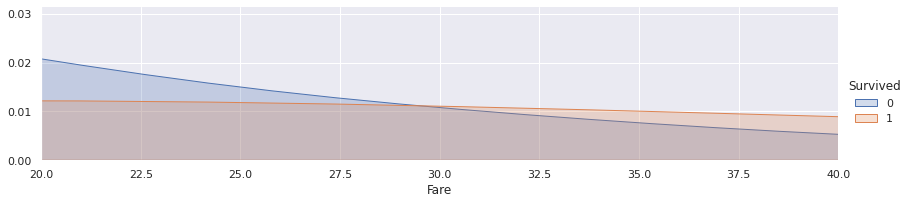

In [38]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.xlim(20,40)

(40.0, 80.0)

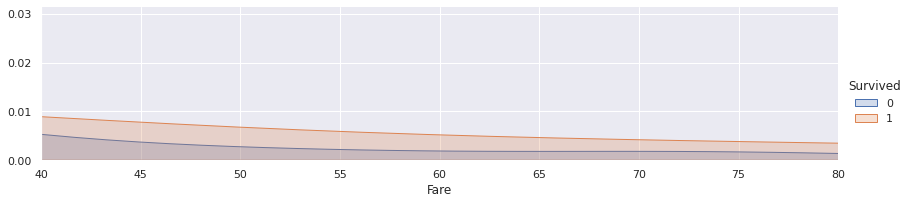

In [39]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.xlim(40,80)

(80.0, 100.0)

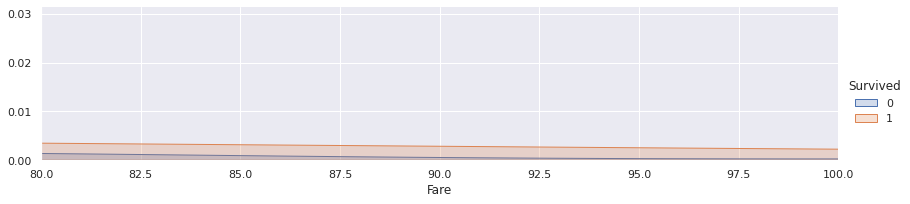

In [40]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.xlim(80,100)

(100.0, 512.3292)

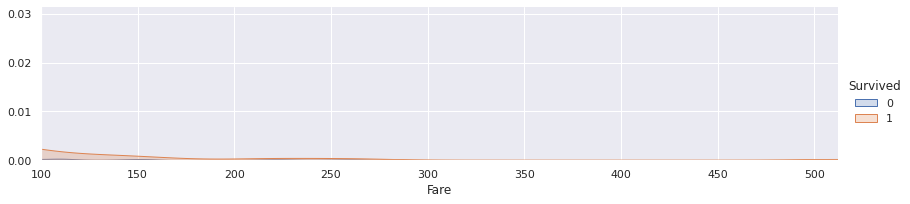

In [41]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.xlim(100,train['Fare'].max())

In [42]:
for dataset in train_test_data:
  dataset.loc[dataset['Fare']<=15,'Fare']=1
  dataset.loc[(dataset['Fare']>15) & (dataset['Fare']<=35),'Fare']=2
  dataset.loc[(dataset['Fare']>35) & (dataset['Fare']<=100),'Fare']=3
  dataset.loc[dataset['Fare']>100,'Fare']=4

<AxesSubplot:>

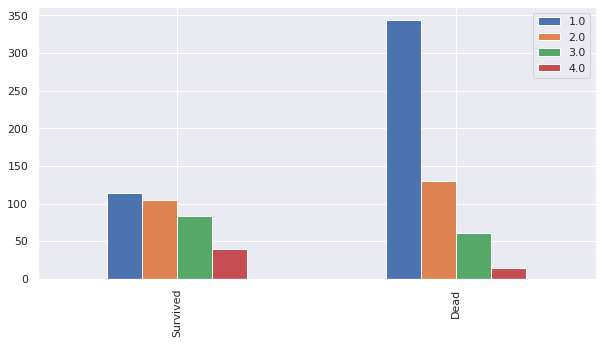

In [43]:
bar_plot('Fare')

In [44]:
for dataset in train_test_data:
  dataset['Cabin']=dataset['Cabin'].str[:1]
train['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

<AxesSubplot:>

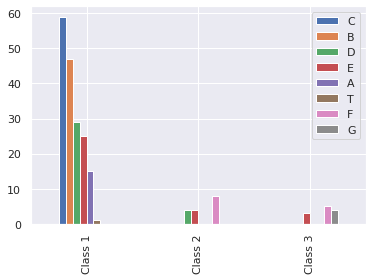

In [45]:
C1=train[train['Pclass']==1]['Cabin'].value_counts()
C2=train[train['Pclass']==2]['Cabin'].value_counts()
C3=train[train['Pclass']==3]['Cabin'].value_counts()
df=pd.DataFrame([C1,C2,C3])
df.index=['Class 1','Class 2','Class 3']
df.plot.bar()

In [46]:
cabin_mapping={"A":0,"B":1,"C":2,"D":3,"E":4,"F":5,"G":6,"T":7}
for dataset in train_test_data:
  dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)
train['Cabin'].fillna(train.groupby(['Pclass'])['Cabin'].transform("median"),inplace=True)
test['Cabin'].fillna(test.groupby(['Pclass'])['Cabin'].transform("median"),inplace=True)

In [47]:
Drop_col=['Ticket','Parch','SibSp']
train=train.drop(Drop_col,axis=1)
test=test.drop(Drop_col,axis=1)
train.drop('PassengerId',axis=1,inplace=True)
train_data=train.drop('Survived',axis=1)
Result=train['Survived']

In [48]:
train_data.shape,Result.shape

((891, 7), (891,))

In [49]:
def score(cm):
  x=cm[0][0]+cm[1][1]
  y=cm[1][0]+cm[0][1]
  return (x/(x+y))*100

In [50]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(train_data,Result)
Pred=classifier.predict(train_data)
from sklearn.metrics import confusion_matrix
cm_logi=confusion_matrix(Result,Pred)
cm_logi

array([[483,  66],
       [101, 241]])

In [51]:
score(cm_logi)

81.25701459034792

In [52]:
from sklearn.neighbors import KNeighborsClassifier
cf_KNN=KNeighborsClassifier(n_neighbors=5)
cf_KNN.fit(train_data,Result)
Pred_KNN=cf_KNN.predict(train_data)
cm_KNN=confusion_matrix(Result,Pred_KNN)
cm_KNN
score(cm_logi)

81.25701459034792

In [53]:
score(cm_KNN)

85.52188552188552

In [54]:
from sklearn.svm import SVC
cf_SVC=SVC(kernel='rbf')
cf_SVC.fit(train_data,Result)
Pred_SVC=cf_SVC.predict(train_data)
cm_SVC=confusion_matrix(Result,Pred_SVC)
cm_SVC

array([[465,  84],
       [ 90, 252]])

In [55]:
score(cm_SVC)

80.47138047138047

In [56]:
from sklearn.naive_bayes import GaussianNB
cf_NB=GaussianNB()
cf_NB.fit(train_data,Result)
Pred_NB=cf_NB.predict(train_data)
cm_NB=confusion_matrix(Result,Pred_NB)
cm_NB

array([[401, 148],
       [ 69, 273]])

In [57]:
score(cm_NB)

75.64534231200898

In [58]:
from sklearn.tree import DecisionTreeClassifier
cf_DT=DecisionTreeClassifier()
cf_DT.fit(train_data,Result)
Pred_DT=cf_DT.predict(train_data)
cm_DT=confusion_matrix(Result,Pred_DT)
cm_DT

array([[527,  22],
       [ 81, 261]])

In [59]:
score(cm_DT)

88.43995510662177

In [60]:
from sklearn.ensemble import RandomForestClassifier
cf_RF=RandomForestClassifier(n_estimators=10)
cf_RF.fit(train_data,Result)
Pred_RF=cf_RF.predict(train_data)
cm_RF=confusion_matrix(Result,Pred_RF)
cm_RF

array([[516,  33],
       [ 74, 268]])

In [61]:
score(cm_RF)

87.99102132435466

In [62]:
test_data=test.drop('PassengerId',axis=1)
Prediction=cf_RF.predict(test_data)
Prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [63]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": Prediction})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [64]:
submission.to_csv('submission.csv', index=False)
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
